In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt   
import folium 
import seaborn as sns 
plt.style.use('seaborn')
import plotly.express as px
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

-The blow model takes into account only the columns that I deemed important when considering change on price. 
-This will serve as a second baseline model for comparison. 
-Location data was removed(zipcode, lat, long)

In [27]:
df_house = pd.read_csv('kc_house_data.csv')

In [41]:
#test Train split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [43]:
#Location Data removed
neededCols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
            'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
            'yr_renovated', 'sqft_living15', 'sqft_lot15']

In [49]:
regression_data = df_house[neededCols]
regression_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,1410,1287


In [45]:
X = regression_data.drop(['price'], axis=1)
y = regression_data['price']



linreg = LinearRegression()
lm = sm.OLS(y_train, X_train)

model_regression = lm.fit()
model_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.881
Model:                            OLS   Adj. R-squared (uncentered):              0.881
Method:                 Least Squares   F-statistic:                              9177.
Date:                Tue, 24 Nov 2020   Prob (F-statistic):                        0.00
Time:                        10:01:35   Log-Likelihood:                     -2.3746e+05
No. Observations:               17290   AIC:                                  4.750e+05
Df Residuals:                   17276   BIC:                                  4.751e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -2.968e+04   2326.284    -12.760      0.000   -3.42e+04   -2.51e+04
bathrooms     -7995.0735   3791.798     -2.109      0.035   -1.54e+04    -562.766
sqft_living     122.6055      2.821     43.458      0.000     117.076     128.135
sqft_lot         -0.0039      0.065     -0.060      0.952      -0.131       0.123
floors         4450.1758   4317.126      1.031      0.303   -4011.828    1.29e+04
waterfront     5.517e+05   2.19e+04     25.144      0.000    5.09e+05    5.95e+05
view           5.495e+04   2608.649     21.064      0.000    4.98e+04    6.01e+04
condition      5.825e+04   2686.665     21.680      0.000     5.3e+04    6.35e+04
grade          1.107e+05   2587.049     42.806      0.000    1.06e+05    1.16e+05
sqft_above       46.7345      2.718     17.196      0.000      41.408      52.062
sqft_basement    75.8710      3.201     23.701      0.000      69.596      82.146
yr_built       -409.1591      9.695    -42.203      0.000    -428.162    -390.156
yr_renovated     69.4426      4.307     16.123      0.000      61.000      77.885
sqft_living15    16.9298      4.158      4.072      0.000       8.780      25.079
sqft_lot15       -0.6247      0.092     -6.812      0.000      -0.804      -0.445
==============================================================================
Omnibus:                    13006.793   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           954079.011
Skew:                           3.004   Prob(JB):                         0.00
Kurtosis:                      38.892   Cond. No.                     4.05e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.51e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

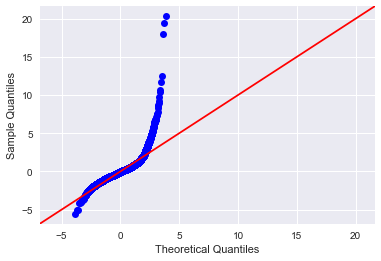

In [46]:
fig = sm.graphics.qqplot(model_regression.resid, dist=stats.norm, line='45', fit=True)

In [47]:
print('MSE for train set:', np.sqrt(mean_squared_error(y_train, model_regression.predict(X_train))))
print('MSE for test set:', np.sqrt(mean_squared_error(y_test,model_regression.predict(X_test))))
print('MSE difference:', np.sqrt(mean_squared_error(y_train, model_regression.predict(X_train))) - np.sqrt(mean_squared_error(y_test, model_regression.predict(X_test))))
print('10 Cross Validation R^2 score for train:', cross_val_score(linreg, X_train, y_train, cv=10, scoring='r2').mean())
print('10 Cross Validation R^2 score for test:', cross_val_score(linreg, X_test, y_test, cv=10, scoring='r2').mean())

MSE for train set: 223079.52309059346
MSE for test set: 236611.33436665515
MSE difference: -13531.811276061693
10 Cross Validation R^2 score for train: 0.6523987322183349
10 Cross Validation R^2 score for test: 0.6453583351983113


In [23]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ 
    Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [25]:
X = regression_data.drop(['price'], axis=1)
y = regression_data['price']

result = stepwise_selection(X, y, verbose = True)
print('resulting features:')
print(result)

/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



Add  view                           with p-value 0.0
Add  bedrooms                       with p-value 0.0
Add  sqft_living15                  with p-value 0.0
Add  sqft_above                     with p-value 0.0
Add  yr_built                       with p-value 0.0
Drop bedrooms                       with p-value 0.82438
Add  sqft_living                    with p-value 0.0


/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:44: FutureWarning:


The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.



Add  grade                          with p-value 0.0
Drop sqft_above                     with p-value 0.167122
Add  waterfront                     with p-value 4.08573e-215
Add  bedrooms                       with p-value 3.5546e-53
Add  bathrooms                      with p-value 6.09665e-64
Add  sqft_lot15                     with p-value 3.00105e-25
Add  condition                      with p-value 2.59849e-11
Add  floors                         with p-value 2.54475e-13
Add  yr_renovated                   with p-value 0.0097621
resulting features:
['view', 'sqft_living15', 'yr_built', 'sqft_living', 'grade', 'waterfront', 'bedrooms', 'bathrooms', 'sqft_lot15', 'condition', 'floors', 'yr_renovated']


In [39]:
import statsmodels.api as sm
X_fin = X[result]
X_with_intercept = sm.add_constant(X_fin)
model = sm.OLS(y,X_with_intercept).fit()
model.summary()

/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     3398.
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        15:48:09   Log-Likelihood:            -2.9614e+05
No. Observations:               21613   AIC:                         5.923e+05
Df Residuals:                   21600   BIC:                         5.924e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.216e+06   1.38e+05     45.165      0.000    5.95e+06    6.49e+06
view            4.38e+04   2234.296     19.604      0.000    3.94e+04    4.82e+04
sqft_living15    23.9194      3.527      6.782      0.000      17.006      30.833
yr_built      -3579.2169     70.675    -50.644      0.000   -3717.744   -3440.689
sqft_living     162.8899      3.574     45.575      0.000     155.884     169.895
grade          1.194e+05   2238.596     53.347      0.000    1.15e+05    1.24e+05
waterfront     5.782e+05   1.86e+04     31.048      0.000    5.42e+05    6.15e+05
bedrooms       -3.93e+04   2026.008    -19.399      0.000   -4.33e+04   -3.53e+04
bathrooms      4.653e+04   3444.688     13.509      0.000    3.98e+04    5.33e+04
sqft_lot15       -0.5603      0.056    -10.086      0.000      -0.669      -0.451
condition      1.972e+04   2492.191      7.911      0.000    1.48e+04    2.46e+04
floors         2.471e+04   3435.357      7.193      0.000     1.8e+04    3.14e+04
yr_renovated     10.1141      3.914      2.584      0.010       2.443      17.785
==============================================================================
Omnibus:                    16293.531   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1184507.441
Skew:                           3.021   Prob(JB):                         0.00
Kurtosis:                      38.761   Cond. No.                     2.83e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""